2017 : 구글 시퀀스 모델링을 위한 새로운 신경망
  - 기계번역에서 RNN을 능가
  - GPT
  - BERT

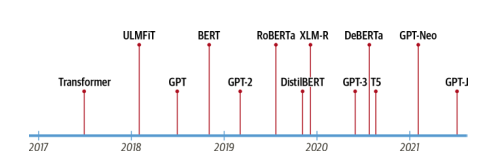

In [1]:
# 기초개념
# 인코더-디코더, 어텐션 매커니즘, 전이학습
# 허깅페이스 라이브러리

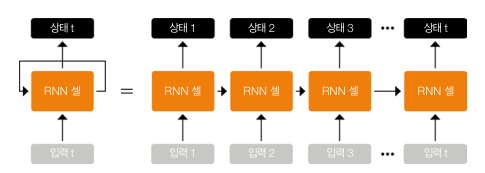

In [ ]:
# RNN : 시퀀스를 한 언어에서 다른 언어로 매핑하는 기계번역 시스템
# 인코더-디코더, 시퀀스 투 시퀀스

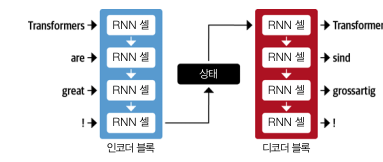

In [2]:
# 이 구조는 인코더의 마지막 은닉상태가 정보병목이 된다는 약점
# 마지막 상태를 가지고 디코더가 문장을 만들기 때문에 마지막상태는 모든 시퀀스를 포함 -> 시작 정보가 손실가능성이  있다
# 디코더가 모든 은닉상태에 접근해서 병목현상을 제거-> 어텐션 매커니즘

In [3]:
# 어텐션은 입력 시퀀스에서 은닉상태를 만들지 않고 스텝마다 인코더에서 디코더가 참고할 은닉상태를 출력 한다는 기본 개념

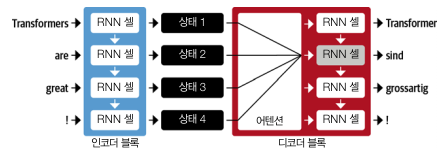

In [ ]:
# 디코더가 모든 디코딩 타임스텝마다 인코더의 각 상태에 다른 가중치 또는 어텐션을 할당
# 태생적으로 계산이 순차적으로 이루어져서 입력 시퀀스 전체에 걸처 병렬화 할 수 없다
# 패러다음 변화, 순환을모두 없애고 셀프어텐션이라는 특별한형태의 어텐션

In [4]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

In [5]:
# 모든 단계를 추상화 할수 있는 파이프라인을 사용

In [7]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.3 MB/s eta 0:00:00


In [8]:
from transformers import pipeline

In [9]:
# pipeline함수를 통해 관심작업에 대한 파이프라인 객체를 생성
classifier =  pipeline("text-classification")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [10]:
# 자동으로 허깅페이스제 접속해서 모델의 가중치를 다운로드
# 파이프라인을 다시 다운로드하면 ... 캐싱된 정보를 사용한다고 안내....
# text-classification  감성분석 -> 다중분류, 다중레이블 분류도 지원

In [11]:
# 텍스를 입력-->예측 리스트반환
outputs = classifier(text)
import pandas as pd
pd.DataFrame(outputs)

,label,score
0,NEGATIVE,0.901546


In [12]:
# 텍스트에서 개체명을 인식하는 작업
# 피드백이 특정 제품과 서비스중 무엇에 대한?
# NLP에서는 제품,장소, 사람같은 실제 객체를 개체명(named entry)
# 개체명을 텍스트에서 추출하는 작업 개체명 인식(NER)

In [13]:
ner_tagger = pipeline("ner",aggregation_strategy='simple')
outputs =  ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,entity_group,score,word,start,end
0,ORG,0.879010,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556571,Mega,208,212
4,PER,0.590256,##tron,212,216
5,ORG,0.669692,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775362,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


In [14]:
# 구체적인 질문-> 질문답변(question answering)

In [16]:
reader = pipeline("question-answering")
question = "What does the customer want?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


,score,start,end,answer
0,0.631292,335,358,an exchange of Megatron


In [17]:
# 답변을 텍스트에서 직접추출  extractive question answering 추출적 질문 답변
# 불평이 산더미처럼 쌓여서 전부 못 읽을때....
# 텍스 요약